In [1]:
using Pkg; Pkg.activate("/home/ilyav/mipt-master-study/SPC/MetropolisHastings/") ; Pkg.status()

  Activating project at `~/mipt-master-study/SPC/MetropolisHastings`


Status `~/mipt-master-study/SPC/MetropolisHastings/Project.toml`
  [b4884d15] Integrators v0.1.0 `deps/Integrators`
  [ee8dca40] Samplers v0.1.0 `deps/Samplers`


In [2]:
using Samplers
using Integrators
using Plots

Kumaraswamy distribution distribution sampling

In [3]:
function KumaraswamyPDF(x, a=0.5, b=0.5)
    return a * b * (x^(a-1)) * ((1 - x^a)^(b-1))
end

KumaraswamyPDF (generic function with 3 methods)

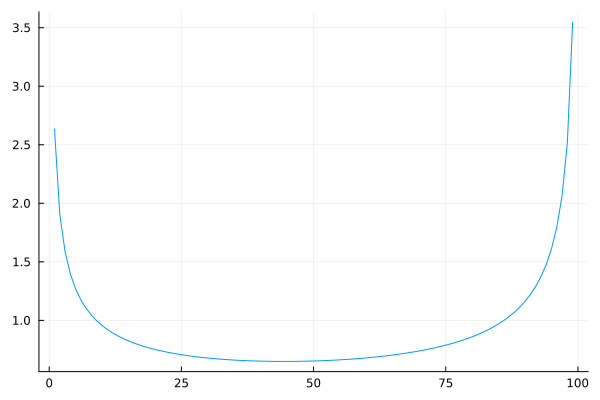

In [4]:
X = [i for i=0.01:0.01:0.99]
plot(KumaraswamyPDF.(X), label=false)

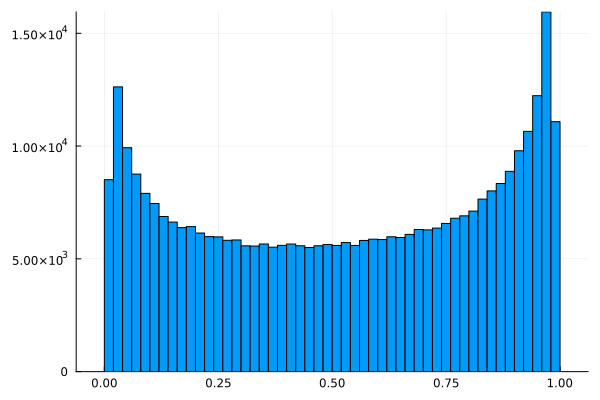

In [10]:
sampels_MH = Samplers.SimpleMHS(
    10^6, 
    sampled_dist=KumaraswamyPDF, 
    init_state=0.5, 
    proposal_std=1.0, 
    bounds=(0.01, 0.99)
)
histogram(sampels_MH, label=false)

Kumaraswamy distribution distribution integration

In [19]:
SimpleIntegrator(
    func=KumaraswamyPDF, 
    sampels_density=NormalDensity, 
    bounds=(0.1, 0.9), 
    init_state=5.0, 
    proposal_std=1.0
)

0.1688114070709765